In [3]:
import pandas as pd 
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedKFold
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import accuracy_score,precision_score,recall_score,auc,confusion_matrix,ConfusionMatrixDisplay,f1_score

In [4]:
x_train_all=pd.read_csv("CompleteDataSet/x_train_all.csv")
y_train_all=pd.read_csv("CompleteDataSet/y_train_all.csv")
x_test_all=pd.read_csv("CompleteDataSet/x_test_all.csv")
y_test_all=pd.read_csv("CompleteDataSet/y_test_all.csv")

### Cross Validation

#### LOOCV

In [5]:
from sklearn.model_selection import KFold 


In [6]:
def kfold_10(input,output):
    kf = KFold(n_splits=10) 
    dt_classifier = DecisionTreeClassifier()
    accuracy_scores = []
    for train_index, test_index in kf.split(input):
        print("Train:", train_index, "Validation:",test_index)
        X_train, X_test = input.iloc[train_index], input.iloc[test_index] 
        y_train, y_test = output.iloc[train_index], output.iloc[test_index]
        dt_classifier.fit(X_train, y_train)
        pred=dt_classifier.predict(X_test)
        accuracy = accuracy_score(y_test, pred)
        accuracy_scores.append(accuracy)
    average_accuracy = sum(accuracy_scores) / 10

    print(f"Average Accuracy: {average_accuracy}")



In [7]:
x_train_all.shape

(9690, 2304)

In [8]:
y_train_all.shape

(9690, 1)

In [9]:
kfold_10(x_train_all,y_train_all)

Train: [ 969  970  971 ... 9687 9688 9689] Validation: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 

part2

In [61]:
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(x_train_all,y_train_all)
pred=dt_classifier.predict(x_test_all)
accuracy = accuracy_score(y_test_all, pred)
print("Accuracy:",accuracy)


Accuracy: 0.6864077669902913


In [11]:
processed_df = pd.read_csv("CompleteDataSet/processed_df2.csv")
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(processed_df,y_train_all)
pred=dt_classifier.predict(x_test_all)
accuracy = accuracy_score(y_test_all, pred)
print("Accuracy:",accuracy)

Accuracy: 0.36019417475728155


In [12]:
copy_data = x_train_all.copy()

In [14]:
def accuracycalc(data):
    dt_classifier = DecisionTreeClassifier()
    dt_classifier.fit(data,y_train_all)
    pred=dt_classifier.predict(x_test_all)
    accuracy = accuracy_score(y_test_all, pred)
    print("Accuracy:",accuracy)

In [28]:
def accuracycalcCus(Xdata,Ydata,Xtdata,Ytdata):
    dt_classifier = DecisionTreeClassifier()
    dt_classifier.fit(Xdata,Ydata)
    pred=dt_classifier.predict(Xtdata)
    accuracy = accuracy_score(Ytdata, pred)
    print("Accuracy:",accuracy)

In [13]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

def PCAOnData(features,components):
    pca = PCA(n_components=components)
    X_pca = pca.fit_transform(features)
    df_pca = pd.DataFrame(data=X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])
    return df_pca

In [16]:
pca50 = PCAOnData(x_train_all,50)
pca50_test = PCAOnData(x_test_all,50)

dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(pca50,y_train_all)
pred=dt_classifier.predict(pca50_test)
accuracy = accuracy_score(y_test_all, pred)
print("Accuracy:",accuracy)



Accuracy: 0.2313915857605178


In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
normalized_data = scaler.fit_transform(copy_data)
accuracycalc(normalized_data)

Accuracy: 0.24271844660194175


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [25]:
import pandas as pd
import cv2
import numpy as np

# Load the CSV file into a DataFrame
df = pd.read_csv("CompleteDataSet/x_train_all.csv")

# Loop through the rows of the DataFrame
for index, row in df.iterrows():
    # Extract the pixel values as a 1D array (assuming all 2304 features represent pixel values)
    pixel_values = row.values

    # Reshape the pixel values to form a 48x48 grayscale image (assuming images are 48x48 pixels)
    image = np.array(pixel_values).reshape(48, 48)

    # Set the threshold value (adjust as needed)
    threshold_value = 128

    # Apply thresholding
    _, binary_image = cv2.threshold(image, threshold_value, 255, cv2.THRESH_BINARY)

    # Flatten the binary image to a 1D array (if needed)
    binary_pixel_values = binary_image.reshape(-1)

    # Update the DataFrame with the binary pixel values
    df.loc[index] = binary_pixel_values

# Save the updated DataFrame with binary pixel values to a new CSV file
df.to_csv("thresholded_data.csv", index=False)

scaler = StandardScaler()
df = scaler.fit_transform(df)



In [21]:
accuracycalc(df) #just thresholding

Accuracy: 0.472168284789644


In [24]:
accuracycalc(df) #normalized then thresholding

Accuracy: 0.24271844660194175


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [26]:
accuracycalc(df) #thresholding then normalized

Accuracy: 0.23300970873786409


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [106]:
# uses isolation forest algorithm to find outliers
from sklearn.ensemble import IsolationForest

# TODO
feature_names = [f'{str(col)}' for col in x_train_all.columns]
x_train_copy = x_train_all.copy()
x_train_copy.columns = feature_names

contamination = 0.01
iso_forest = IsolationForest(contamination=contamination, random_state=42)

outliers = iso_forest.fit_predict(x_train_copy)

outlier_indices = x_train_copy.index[outliers == -1]

x_train_no_outliers = x_train_copy.drop(outlier_indices)
x_train_no_outliers.to_csv('x_train_no_outliers.csv',index=False)

outlier_indices_df = pd.DataFrame({'outlier_index': outlier_indices})

outlier_indices_df.to_csv('outlier_indices.csv', index=False)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [31]:
mean=x_train_all.mean()
std=x_train_all.std()
x_train_norm=(x_train_all-mean)/std
x_train_norm=pd.DataFrame(x_train_norm)
x_train_norm

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
0,-0.150391,-0.162019,-0.172510,-0.097637,-0.036321,0.027779,0.183130,0.376504,0.348157,0.382097,...,0.225873,0.109515,0.009264,0.083321,0.205589,0.404792,0.477724,0.472859,0.432739,0.418963
1,-0.214889,-0.187848,-0.133726,-0.149251,-0.178371,-0.192203,-0.011458,0.220825,0.555781,0.446901,...,0.363553,0.323454,0.208034,0.098671,-0.010174,0.063867,0.228791,0.504208,0.527321,0.529189
2,-0.227789,-0.187848,-0.133726,-0.162154,-0.113803,-0.011041,0.196103,0.246771,-0.054114,-0.006728,...,0.394149,0.354016,0.253904,0.144723,0.051472,0.032874,0.088767,0.190725,0.338157,0.434710
3,-0.292287,-0.252422,-0.198367,-0.123444,0.041161,0.221881,0.260966,0.078119,-0.274715,0.122880,...,0.608317,0.308172,0.238614,0.175424,0.113119,0.048370,0.026534,0.065332,0.212048,0.324484
4,-0.201990,-0.200763,-0.211295,-0.226672,-0.165458,-0.036921,0.183130,0.246771,-0.080067,-0.097454,...,0.424744,0.399861,0.422093,0.451734,0.452175,0.311812,0.151000,-0.028713,0.007120,0.072541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9685,2.029654,1.684798,2.128704,1.592712,0.506053,1.528831,2.129016,2.140865,2.138915,2.131807,...,-0.569611,-0.654553,-0.678785,-0.684207,-0.688287,-0.710962,-0.720262,-0.655679,-0.654953,-0.636050
9686,0.791285,0.367488,2.128704,2.134657,2.133176,2.137016,2.129016,2.127892,2.125938,2.092924,...,-0.539015,-0.623990,-0.632915,-0.622805,-0.611229,-0.602486,-0.611354,-0.655679,-0.623425,-0.636050
9687,2.132851,2.136816,2.141633,2.134657,2.133176,2.137016,2.141989,2.140865,2.138915,2.131807,...,-0.477824,-0.348926,-0.449436,-0.530701,-0.564994,-0.509506,-0.455772,-0.577308,-0.450025,-0.384107
9688,2.132851,2.110986,2.141633,2.134657,2.133176,2.137016,2.141989,2.140865,2.138915,2.131807,...,-0.523717,-0.685116,-0.694075,-0.668856,-0.534170,-0.633479,-0.642471,-0.655679,-0.654953,-0.683289


In [33]:
accuracycalc(x_train_norm)

Accuracy: 0.24271844660194175


In [41]:
import pandas as pd
from imblearn.over_sampling import SMOTE

X = x_train_all
y = y_train_all
smote = SMOTE(sampling_strategy='auto', random_state=19)
X_resampled, y_resampled = smote.fit_resample(X, y)
balanced_data = pd.concat([X_resampled, y_resampled], axis=1)
balanced_data.to_csv('balanced_dataset.csv', index=False)


In [42]:
accuracycalcCus(X_resampled,y_resampled,x_test_all,y_test_all)

Accuracy: 0.6618122977346278


In [39]:
import pandas as pd
from imblearn.under_sampling import RandomUnderSampler

X = x_train_all
y = y_train_all
rus = RandomUnderSampler(sampling_strategy='auto', random_state=19)
X_resampled2, y_resampled2 = rus.fit_resample(X, y)
balanced_data2 = pd.concat([X_resampled2, y_resampled2], axis=1)
balanced_data2.to_csv('balanced_dataset2.csv', index=False)


In [40]:
accuracycalcCus(X_resampled2,y_resampled2,x_test_all,y_test_all)

Accuracy: 0.5498381877022653


In [52]:
y_train_all_copy = y_train_all.rename(columns={y_train_all.columns[0]:"labels"})
completedata = pd.concat([x_train_all,y_train_all_copy], axis=1)
completedata

,0,1,2,3,4,5,6,7,8,9,...,2295,2296,2297,2298,2299,2300,2301,2302,2303,labels
0,78.0,77.0,76.0,82.0,87.0,92.0,104.0,119.0,117.0,120.0,...,79.0,72.0,76.0,83.0,95.0,99.0,98.0,95.0,94.0,0
1,73.0,75.0,79.0,78.0,76.0,75.0,89.0,107.0,133.0,125.0,...,93.0,85.0,77.0,69.0,73.0,83.0,100.0,101.0,101.0,0
2,72.0,75.0,79.0,77.0,81.0,89.0,105.0,109.0,86.0,90.0,...,95.0,88.0,80.0,73.0,71.0,74.0,80.0,89.0,95.0,0
3,67.0,70.0,74.0,80.0,93.0,107.0,110.0,96.0,69.0,100.0,...,92.0,87.0,82.0,77.0,72.0,70.0,72.0,81.0,88.0,0
4,74.0,74.0,73.0,72.0,77.0,87.0,104.0,109.0,84.0,83.0,...,98.0,99.0,100.0,99.0,89.0,78.0,66.0,68.0,72.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9685,247.0,220.0,254.0,213.0,129.0,208.0,254.0,255.0,255.0,255.0,...,29.0,27.0,26.0,25.0,23.0,22.0,26.0,26.0,27.0,9
9686,151.0,118.0,254.0,255.0,255.0,255.0,254.0,254.0,254.0,252.0,...,31.0,30.0,30.0,30.0,30.0,29.0,26.0,28.0,27.0,9
9687,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,49.0,42.0,36.0,33.0,36.0,39.0,31.0,39.0,43.0,9
9688,255.0,253.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,27.0,26.0,27.0,35.0,28.0,27.0,26.0,26.0,24.0,9


In [54]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
completedata['labels'] = le.fit_transform(completedata['labels'])

In [62]:
completedata_noy = completedata.drop(columns =['labels'])
accuracycalc(completedata_noy)

Accuracy: 0.6909385113268608


hyper parameter tuning on raw data

In [63]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

param_grid = {
    'max_depth': [None, 10, 20, 30],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4],  
    'criterion': ['gini', 'entropy']  
}

dt = DecisionTreeClassifier()

grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy',n_jobs=5)
grid_search.fit(x_train_all, y_train_all) 

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_


In [64]:
print(best_params)
print(best_model)

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=4,
                       min_samples_split=10)


In [65]:
dt_classifier = best_model
dt_classifier.fit(x_train_all,y_train_all)
pred=dt_classifier.predict(x_test_all)
accuracy = accuracy_score(y_test_all, pred)
print("Accuracy:",accuracy)

Accuracy: 0.7239482200647249


In [66]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier

param_dist = {
    'max_depth': [None] + list(range(10, 31)), 
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4],  
    'criterion': ['gini', 'entropy'] 
}

dt = DecisionTreeClassifier()

random_search = RandomizedSearchCV(dt, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=19)
random_search.fit(x_train_all, y_train_all)  

best_params2 = random_search.best_params_
best_model2 = random_search.best_estimator_


In [67]:
print(best_params2)
print(best_model2)

{'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 25, 'criterion': 'entropy'}
DecisionTreeClassifier(criterion='entropy', max_depth=25, min_samples_leaf=4)


In [68]:
dt_classifier = best_model2
dt_classifier.fit(x_train_all,y_train_all)
pred=dt_classifier.predict(x_test_all)
accuracy = accuracy_score(y_test_all, pred)
print("Accuracy:",accuracy)

Accuracy: 0.7258899676375404


In [112]:
from skopt import BayesSearchCV
from sklearn.tree import DecisionTreeClassifier

param_space = {
    'max_depth': (2, 30),
    'min_samples_leaf': (1, 10),
    'criterion': ['gini', 'entropy']
}

dt = DecisionTreeClassifier()

bayes_search = BayesSearchCV(dt, param_space, n_iter=50, cv=5)
bayes_search.fit(x_train_all, y_train_all)

best_params3 = bayes_search.best_params_
best_model3 = bayes_search.best_estimator_


KeyboardInterrupt: 

In [70]:
print(best_params3)
print(best_model3)

OrderedDict([('criterion', 'entropy'), ('max_depth', 10), ('min_samples_leaf', 1)])
DecisionTreeClassifier(criterion='entropy', max_depth=10)


In [72]:
dt_classifier = best_model3
dt_classifier.fit(x_train_all,y_train_all)
pred=dt_classifier.predict(x_test_all)
accuracy = accuracy_score(y_test_all, pred)
print("Accuracy:",accuracy)

Accuracy: 0.7368932038834951


hyper parameter tuning on no outliers

In [77]:
y_train_no_outliers  = y_train_all.drop(outlier_indices)

In [84]:
y_train_no_outliers.shape

(9593, 1)

In [85]:
x_train_no_outliers.shape

(9593, 2304)

In [86]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

param_grid = {
    'max_depth': [None, 10, 20, 30],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4],  
    'criterion': ['gini', 'entropy']  
}

dt = DecisionTreeClassifier()

grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy',n_jobs=5)
grid_search.fit(x_train_no_outliers, y_train_no_outliers) 

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_


In [87]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier

param_dist = {
    'max_depth': [None] + list(range(10, 31)), 
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4],  
    'criterion': ['gini', 'entropy'] 
}

dt = DecisionTreeClassifier()

random_search = RandomizedSearchCV(dt, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=19)
random_search.fit(x_train_no_outliers, y_train_no_outliers)  

best_params2 = random_search.best_params_
best_model2 = random_search.best_estimator_


In [88]:
from skopt import BayesSearchCV
from sklearn.tree import DecisionTreeClassifier

param_space = {
    'max_depth': (2, 30),
    'min_samples_leaf': (1, 10),
    'criterion': ['gini', 'entropy']
}

dt = DecisionTreeClassifier()

bayes_search = BayesSearchCV(dt, param_space, n_iter=50, cv=5)
bayes_search.fit(x_train_no_outliers, y_train_no_outliers)

best_params3 = bayes_search.best_params_
best_model3 = bayes_search.best_estimator_


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.1

In [109]:
dt_classifier = best_model
dt_classifier.fit(x_train_no_outliers,y_train_no_outliers)
pred=dt_classifier.predict(x_test_all)
accuracy = accuracy_score(y_test_all, pred)
print("Accuracy:",accuracy)

Accuracy: 0.7155339805825243


In [110]:
dt_classifier = best_model2
dt_classifier.fit(x_train_no_outliers,y_train_no_outliers)
pred=dt_classifier.predict(x_test_all)
accuracy = accuracy_score(y_test_all, pred)
print("Accuracy:",accuracy)

Accuracy: 0.7184466019417476


In [111]:
dt_classifier = best_model3
dt_classifier.fit(x_train_no_outliers,y_train_no_outliers)
pred=dt_classifier.predict(x_test_all)
accuracy = accuracy_score(y_test_all, pred)
print("Accuracy:",accuracy)

Accuracy: 0.7135922330097088


In [113]:
processed_df

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
0,113,99,92,106,114,123,148,182,190,170,...,182,177,106,71,68,120,197,234,220,191
1,106,106,113,120,110,114,114,120,141,120,...,142,135,105,144,159,151,171,205,170,135
2,85,92,128,142,166,189,166,141,131,135,...,171,135,121,144,128,85,71,85,142,170
3,57,64,78,106,128,165,138,76,69,120,...,176,99,67,97,138,160,147,106,71,64
4,120,113,92,92,115,123,128,106,105,128,...,101,99,112,127,148,158,154,128,128,128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9685,227,220,198,191,211,232,224,207,206,198,...,110,50,42,49,36,30,39,78,78,71
9686,92,120,170,198,164,120,110,116,138,156,...,147,120,98,66,50,59,86,135,156,156
9687,255,248,227,198,194,205,202,205,222,234,...,84,71,81,90,106,139,166,184,177,177
9688,212,212,227,227,243,250,238,215,214,227,...,87,50,46,81,124,132,108,57,42,50


In [115]:
dt_classifier = DecisionTreeClassifier(criterion='entropy', max_depth=10)
dt_classifier.fit(processed_df,y_train_all)
pred=dt_classifier.predict(x_test_all)
accuracy = accuracy_score(y_test_all, pred)
print("Accuracy:",accuracy)

Accuracy: 0.34433656957928804


In [116]:
pro_iso = pd.read_csv("processed_df_iso.csv")

In [117]:
pro_iso

,Unnamed: 0,0,1
0,0,0.0,0.000000
1,1,0.0,0.000000
2,2,0.0,0.000000
3,3,0.0,0.000000
4,4,0.0,0.000000
...,...,...,...
9588,9588,0.0,287.964037
9589,9589,0.0,0.000000
9590,9590,0.0,255.000000
9591,9591,0.0,0.000000


In [118]:
pro_iso= pro_iso.rename(columns={pro_iso.columns[0]:"labels"})

In [119]:
pro_iso

,labels,0,1
0,0,0.0,0.000000
1,1,0.0,0.000000
2,2,0.0,0.000000
3,3,0.0,0.000000
4,4,0.0,0.000000
...,...,...,...
9588,9588,0.0,287.964037
9589,9589,0.0,0.000000
9590,9590,0.0,255.000000
9591,9591,0.0,0.000000


In [120]:
pro_iso = pro_iso.drop(columns =['labels'])

In [121]:
pro_iso

,0,1
0,0.0,0.000000
1,0.0,0.000000
2,0.0,0.000000
3,0.0,0.000000
4,0.0,0.000000
...,...,...
9588,0.0,287.964037
9589,0.0,0.000000
9590,0.0,255.000000
9591,0.0,0.000000


In [122]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

param_grid = {
    'max_depth': [None, 10, 20, 30],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4],  
    'criterion': ['gini', 'entropy']  
}

dt = DecisionTreeClassifier()

grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy',n_jobs=5)
grid_search.fit(pro_iso, y_train_no_outliers) 

best_params_iso = grid_search.best_params_
best_model_iso = grid_search.best_estimator_

print(best_model_iso)


DecisionTreeClassifier(criterion='entropy', min_samples_leaf=2,
                       min_samples_split=10)


In [123]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier

param_dist = {
    'max_depth': [None] + list(range(10, 31)), 
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4],  
    'criterion': ['gini', 'entropy'] 
}

dt = DecisionTreeClassifier()

random_search = RandomizedSearchCV(dt, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=19)
random_search.fit(pro_iso, y_train_no_outliers)  

best_params_iso2 = random_search.best_params_
best_model_iso2 = random_search.best_estimator_

print(best_model_iso2)


DecisionTreeClassifier(criterion='entropy', max_depth=23, min_samples_leaf=2,
                       min_samples_split=5)


In [124]:
from skopt import BayesSearchCV
from sklearn.tree import DecisionTreeClassifier

param_space = {
    'max_depth': (2, 30),
    'min_samples_leaf': (1, 10),
    'criterion': ['gini', 'entropy']
}

dt = DecisionTreeClassifier()

bayes_search = BayesSearchCV(dt, param_space, n_iter=50, cv=5)
bayes_search.fit(pro_iso, y_train_no_outliers)

best_params_iso3 = bayes_search.best_params_
best_model_iso3 = bayes_search.best_estimator_

print(best_model_iso3)


DecisionTreeClassifier(criterion='entropy', max_depth=2, min_samples_leaf=6)


In [125]:
from sklearn.manifold import Isomap
data_df = x_test_all.copy()
isomap = Isomap(n_components=2)
iso_test = isomap.fit_transform(data_df)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/manifold/_isomap.py:373: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


In [126]:
dt_classifier = best_model_iso
dt_classifier.fit(pro_iso,y_train_no_outliers)
pred=dt_classifier.predict(iso_test)
accuracy = accuracy_score(y_test_all, pred)
print("Accuracy:",accuracy)

Accuracy: 0.1546925566343042


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [127]:
dt_classifier = best_model_iso2
dt_classifier.fit(pro_iso,y_train_no_outliers)
pred=dt_classifier.predict(iso_test)
accuracy = accuracy_score(y_test_all, pred)
print("Accuracy:",accuracy)

Accuracy: 0.1546925566343042


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [128]:
dt_classifier = best_model_iso3
dt_classifier.fit(pro_iso,y_train_no_outliers)
pred=dt_classifier.predict(iso_test)
accuracy = accuracy_score(y_test_all, pred)
print("Accuracy:",accuracy)

Accuracy: 0.1546925566343042


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [133]:
import pandas as pd
import matplotlib.pyplot as plt

y_new = y_train_all.rename(columns={y_train_all.columns[0]:"label"})
df = pd.concat([x_train_all,y_new],axis=1)
df

,0,1,2,3,4,5,6,7,8,9,...,2295,2296,2297,2298,2299,2300,2301,2302,2303,label
0,78.0,77.0,76.0,82.0,87.0,92.0,104.0,119.0,117.0,120.0,...,79.0,72.0,76.0,83.0,95.0,99.0,98.0,95.0,94.0,0
1,73.0,75.0,79.0,78.0,76.0,75.0,89.0,107.0,133.0,125.0,...,93.0,85.0,77.0,69.0,73.0,83.0,100.0,101.0,101.0,0
2,72.0,75.0,79.0,77.0,81.0,89.0,105.0,109.0,86.0,90.0,...,95.0,88.0,80.0,73.0,71.0,74.0,80.0,89.0,95.0,0
3,67.0,70.0,74.0,80.0,93.0,107.0,110.0,96.0,69.0,100.0,...,92.0,87.0,82.0,77.0,72.0,70.0,72.0,81.0,88.0,0
4,74.0,74.0,73.0,72.0,77.0,87.0,104.0,109.0,84.0,83.0,...,98.0,99.0,100.0,99.0,89.0,78.0,66.0,68.0,72.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9685,247.0,220.0,254.0,213.0,129.0,208.0,254.0,255.0,255.0,255.0,...,29.0,27.0,26.0,25.0,23.0,22.0,26.0,26.0,27.0,9
9686,151.0,118.0,254.0,255.0,255.0,255.0,254.0,254.0,254.0,252.0,...,31.0,30.0,30.0,30.0,30.0,29.0,26.0,28.0,27.0,9
9687,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,49.0,42.0,36.0,33.0,36.0,39.0,31.0,39.0,43.0,9
9688,255.0,253.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,27.0,26.0,27.0,35.0,28.0,27.0,26.0,26.0,24.0,9


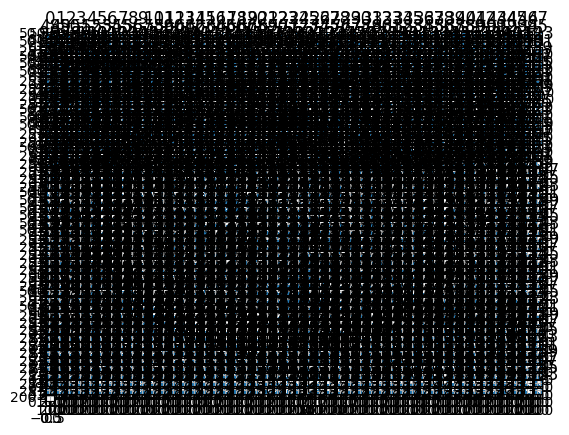

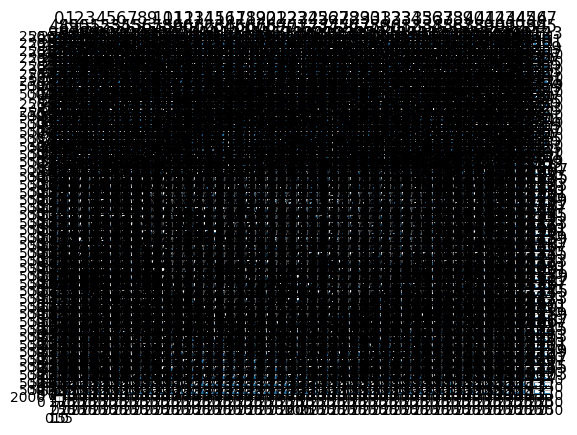

KeyboardInterrupt: 

In [134]:
df.groupby('label').hist()
plt.show()

In [138]:
prepped_data = pd.read_csv("prepped_infrared_df2.csv")
prepped_data = prepped_data.rename(columns={prepped_data.columns[0]:"label"})
prepped_data = prepped_data.drop(columns =['label'])
prepped_data

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
0,12,12,12,12,12,12,12,12,12,12,...,13,13,13,13,13,13,13,13,13,13
1,12,12,12,12,12,12,12,12,12,13,...,13,13,13,13,13,13,13,13,13,13
2,12,12,12,12,12,12,12,13,13,13,...,13,13,13,13,13,13,13,13,13,13
3,12,12,12,12,12,12,12,13,13,14,...,13,13,13,13,13,13,13,13,13,13
4,12,12,12,12,12,12,12,12,12,12,...,13,13,13,13,13,13,13,13,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9588,24,24,24,24,24,24,23,23,22,22,...,13,13,13,13,13,13,13,13,13,13
9589,21,21,22,22,23,23,23,24,24,24,...,13,13,13,13,13,13,13,13,13,13
9590,26,26,26,26,26,26,26,26,26,26,...,13,13,13,13,13,13,13,13,13,13
9591,26,26,26,26,26,26,26,26,26,26,...,13,13,13,13,13,13,13,13,13,13


In [139]:
dt_classifier = DecisionTreeClassifier(criterion='entropy', max_depth=10)
dt_classifier.fit(prepped_data,y_train_no_outliers)
pred=dt_classifier.predict(x_test_all)
accuracy = accuracy_score(y_test_all, pred)
print("Accuracy:",accuracy)

Accuracy: 0.1255663430420712


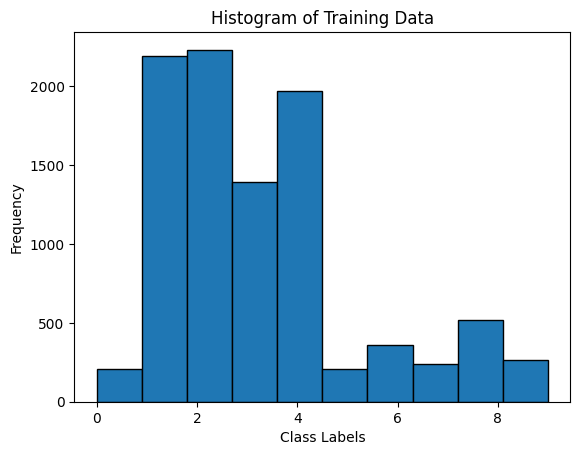

In [140]:
import matplotlib.pyplot as plt

# Plot a histogram of the training data
plt.hist(y_train_no_outliers, bins=10, edgecolor='k')  # You can adjust the number of bins as needed
plt.xlabel("Class Labels")
plt.ylabel("Frequency")
plt.title("Histogram of Training Data")
plt.show()


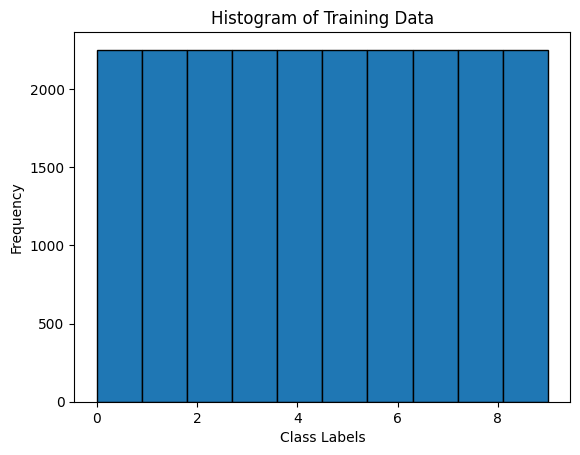

In [141]:
import matplotlib.pyplot as plt

# Plot a histogram of the training data
plt.hist(y_resampled, bins=10, edgecolor='k')  # You can adjust the number of bins as needed
plt.xlabel("Class Labels")
plt.ylabel("Frequency")
plt.title("Histogram of Training Data")
plt.show()

In [144]:
dt_classifier = DecisionTreeClassifier(criterion='entropy', max_depth=10)
dt_classifier.fit(X_resampled,y_resampled)
pred=dt_classifier.predict(x_test_all)
accuracy = accuracy_score(y_test_all, pred)
print("Accuracy:",accuracy)

Accuracy: 0.6928802588996764


In [145]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier

param_dist = {
    'max_depth': [None] + list(range(10, 31)), 
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4],  
    'criterion': ['gini', 'entropy'] 
}

dt = DecisionTreeClassifier()

random_search = RandomizedSearchCV(dt, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=19)
random_search.fit(X_resampled, y_resampled)  

best_params_Re = random_search.best_params_
best_model_Re = random_search.best_estimator_

print(best_model_iso2)


DecisionTreeClassifier(criterion='entropy', max_depth=23, min_samples_leaf=2,
                       min_samples_split=5)


In [146]:
dt_classifier = best_model_Re
dt_classifier.fit(X_resampled,y_resampled)
pred=dt_classifier.predict(x_test_all)
accuracy = accuracy_score(y_test_all, pred)
print("Accuracy:",accuracy)

Accuracy: 0.7009708737864078


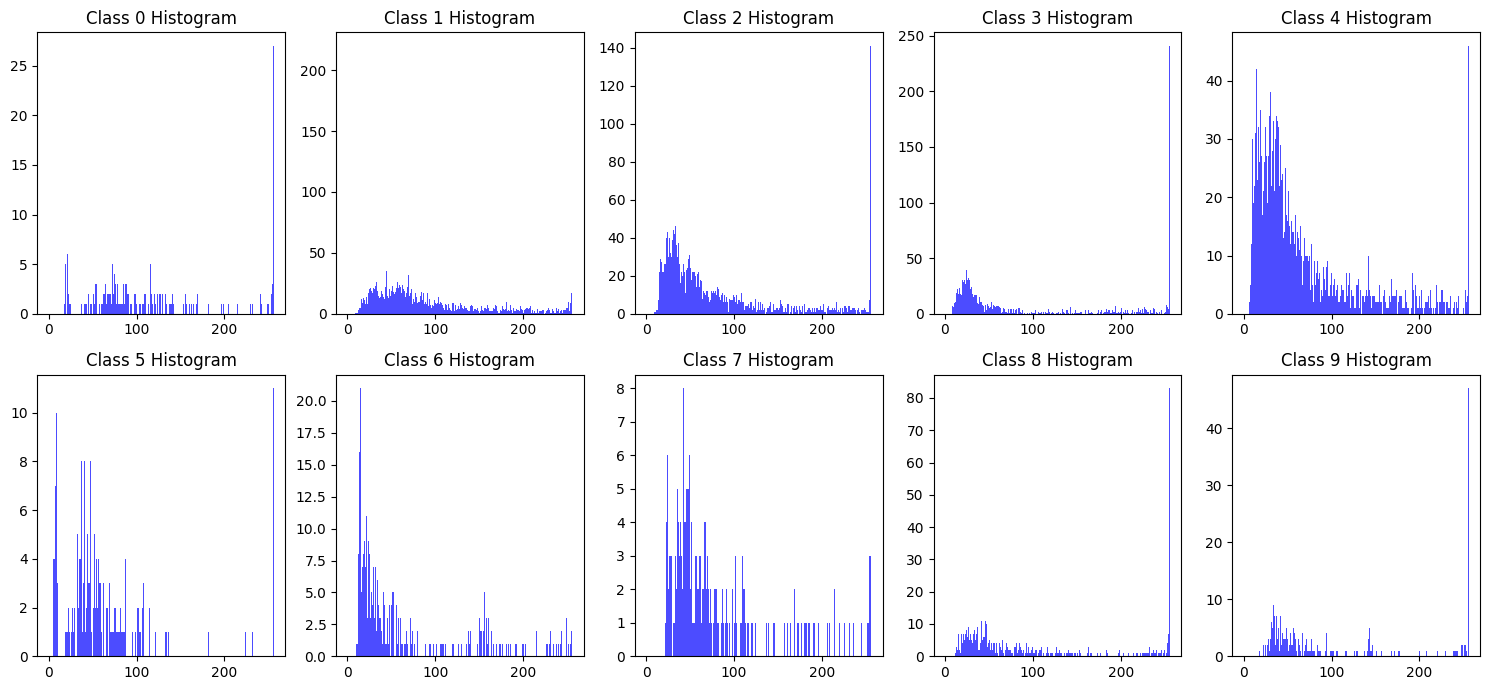

In [148]:
import matplotlib.pyplot as plt
import numpy as np

class_data = [x_train_all[y_train_all == label] for label in range(10)] 

plt.figure(figsize=(15, 7))

for i, class_values in enumerate(class_data):
    plt.subplot(2, 5, i + 1)  
    plt.hist(class_values.to_numpy().ravel(), bins=256, range=(0, 256), color='b', alpha=0.7)
    plt.title(f'Class {i} Histogram')

plt.tight_layout()
plt.show()


In [149]:
import pandas as pd
import numpy as np
import cv2

# Load your CSV file containing grayscale images into a DataFrame
df = x_train_all.copy()

# Define a function to apply histogram equalization to an individual image
def apply_histogram_equalization(image):
    # Reshape the image data (assuming 48x48 dimensions)
    image_matrix = image.values.reshape(48, 48).astype(np.uint8)

    # Apply histogram equalization
    equalized_image = cv2.equalizeHist(image_matrix)

    # Reshape the equalized image back to a feature vector
    equalized_image_vector = equalized_image.ravel()
    return equalized_image_vector

# Apply histogram equalization to each image in the DataFrame
equalized_images = df.apply(apply_histogram_equalization, axis=1)

# Create a new DataFrame with the equalized images
equalized_df = pd.DataFrame(list(equalized_images))

# Save the equalized data to a new CSV file
equalized_df.to_csv("equalized_dataset.csv", index=False)


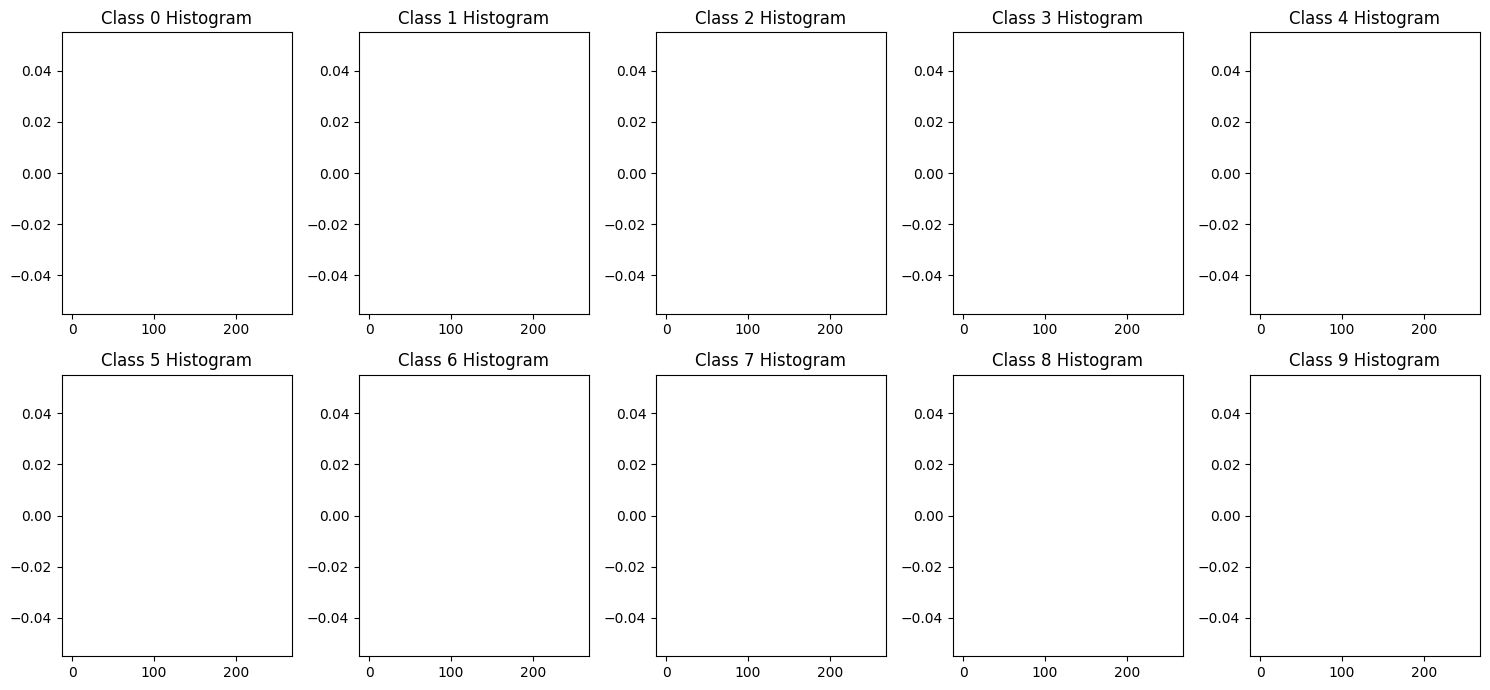

In [150]:
class_data = [equalized_df[y_train_all == label] for label in range(10)] 

plt.figure(figsize=(15, 7))

for i, class_values in enumerate(class_data):
    plt.subplot(2, 5, i + 1)  
    plt.hist(class_values.to_numpy().ravel(), bins=256, range=(0, 256), color='b', alpha=0.7)
    plt.title(f'Class {i} Histogram')

plt.tight_layout()
plt.show()

In [151]:
dt_classifier = DecisionTreeClassifier(criterion='entropy', max_depth=10)
dt_classifier.fit(equalized_df,y_train_all)
pred=dt_classifier.predict(x_test_all)
accuracy = accuracy_score(y_test_all, pred)
print("Accuracy:",accuracy)

Accuracy: 0.4533980582524272


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [170]:
import pandas as pd
import numpy as np

data = x_train_all.copy()
y_train = y_train_all.copy()
y_train = y_train.rename(columns={y_train.columns[0]:"label"})

class_ranges = {
    0: (0, 25),
    1: (26, 51),
    2: (52, 77),
    3: (78, 103),
    4: (104, 129),
    5: (130, 155),
    6: (156, 181),
    7: (182, 207),
    8: (208, 233),
    9: (234, 255)
}

for class_num in range(10):
    class_df = data[y_train['label'] == class_num].copy()
    for index, row in class_df.iterrows():
        image = row.values 
        min_val, max_val = class_ranges[class_num]
        
        processed_image = np.clip(image, min_val, max_val)
        #processed_image = (image - image.min()) * ((max_val - min_val) / (image.max() - image.min())) + min_val
        
        data.loc[index] = processed_image

data.to_csv("processed_dataset.csv", index=False)


In [171]:
dt_classifier = DecisionTreeClassifier(criterion='entropy', max_depth=10)
dt_classifier.fit(data,y_train_all)
pred=dt_classifier.predict(x_test_all)
accuracy = accuracy_score(y_test_all, pred)
print("Accuracy:",accuracy)

Accuracy: 0.14724919093851133


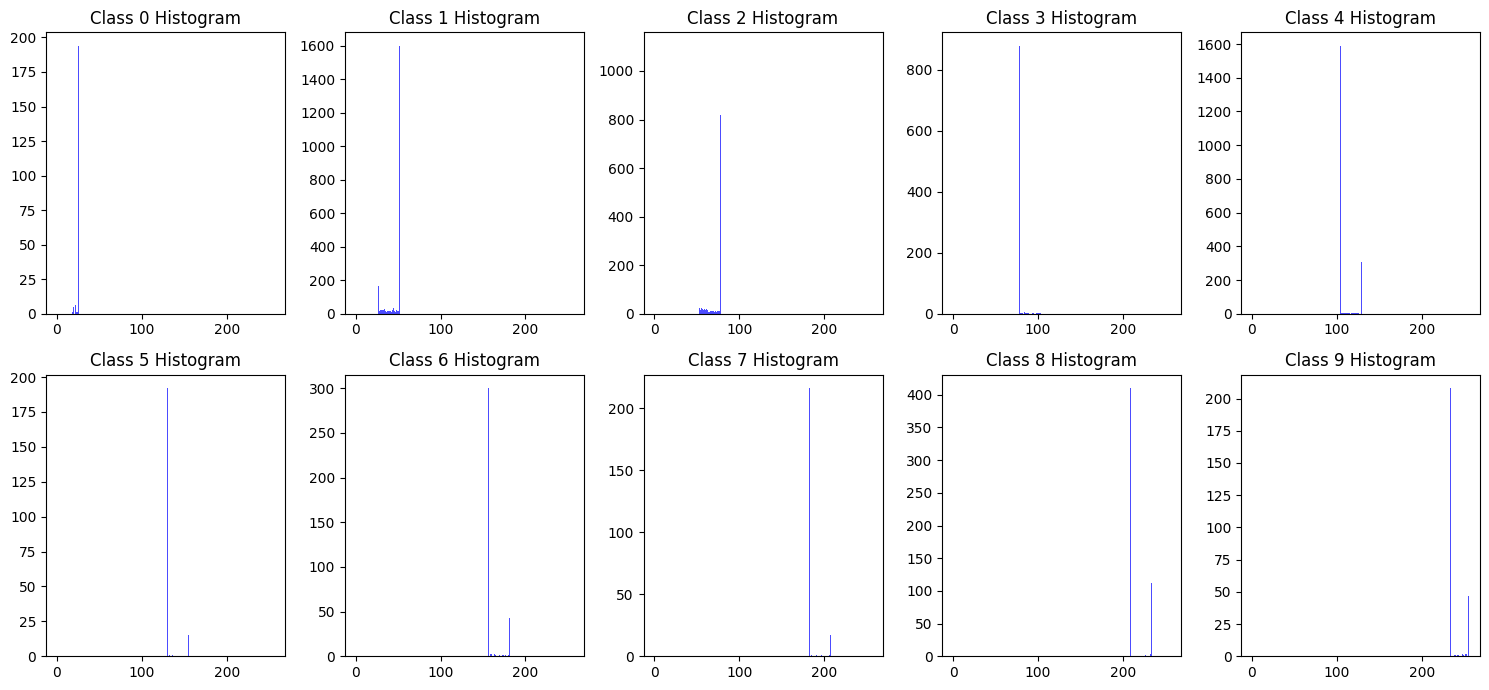

In [172]:
class_data = [data[y_train_all == label] for label in range(10)] 

plt.figure(figsize=(15, 7))

for i, class_values in enumerate(class_data):
    plt.subplot(2, 5, i + 1)  
    plt.hist(class_values.to_numpy().ravel(), bins=256, range=(0, 256), color='b', alpha=0.7)
    plt.title(f'Class {i} Histogram')

plt.tight_layout()
plt.show()

In [173]:
import pandas as pd
import numpy as np
import cv2

# Load your CSV file containing grayscale images into a DataFrame
df = data.copy()

# Define a function to apply histogram equalization to an individual image
def apply_histogram_equalization(image):
    # Reshape the image data (assuming 48x48 dimensions)
    image_matrix = image.values.reshape(48, 48).astype(np.uint8)

    # Apply histogram equalization
    equalized_image = cv2.equalizeHist(image_matrix)

    # Reshape the equalized image back to a feature vector
    equalized_image_vector = equalized_image.ravel()
    return equalized_image_vector

# Apply histogram equalization to each image in the DataFrame
equalized_images = df.apply(apply_histogram_equalization, axis=1)

# Create a new DataFrame with the equalized images
equalized_df = pd.DataFrame(list(equalized_images))

# Save the equalized data to a new CSV file
equalized_df.to_csv("equalized_dataset2.csv", index=False)


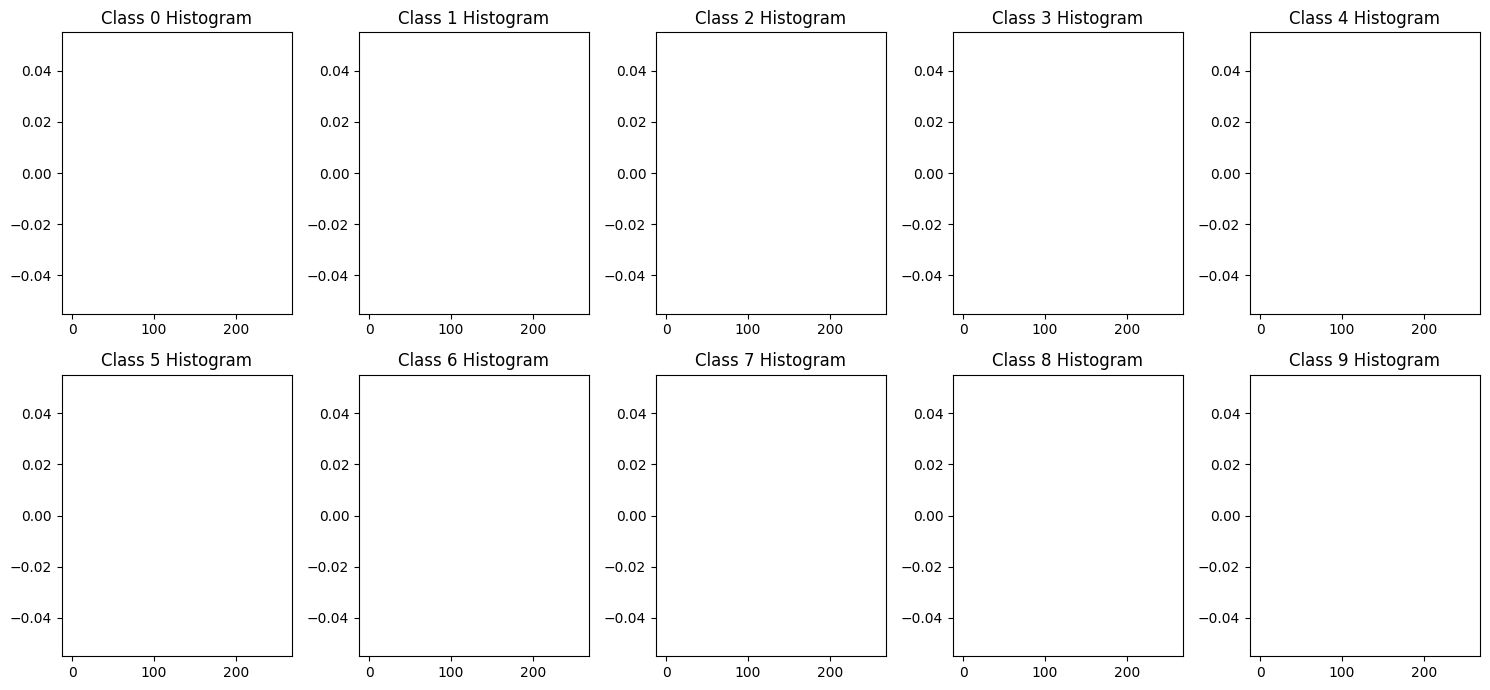

In [175]:
class_data = [equalized_df[y_train_all == label] for label in range(10)] 

plt.figure(figsize=(15, 7))

for i, class_values in enumerate(class_data):
    plt.subplot(2, 5, i + 1)  
    plt.hist(class_values.to_numpy().ravel(), bins=256, range=(0, 256), color='b', alpha=0.7)
    plt.title(f'Class {i} Histogram')

plt.tight_layout()
plt.show()

In [176]:
dt_classifier = DecisionTreeClassifier(criterion='entropy', max_depth=10)
dt_classifier.fit(equalized_df,y_train_all)
pred=dt_classifier.predict(x_test_all)
accuracy = accuracy_score(y_test_all, pred)
print("Accuracy:",accuracy)

Accuracy: 0.3572815533980582


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
